In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [46]:
df = pd.read_csv('Crime_Report.csv')
df['DateandTime'] = pd.to_datetime(df['date'])
df

,Unnamed: 0,Unnamed: 0.1,unique_key,case_number,date,block,iucr,primary_type,description,location_description,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,DateandTime
0,4001774,4001774,4324667,HL629300,2005-09-22 19:55:41+00:00,026XX N HOYNE AVE,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA PARKING LOT/GROUNDS,...,7.0,26,1162364.0,1917615.0,2005,2018-02-10 15:50:01+00:00,41.929597,-87.678774,"(41.929597339, -87.678773892)",2005-09-22 19:55:41+00:00
1,6518132,6518132,10349385,HY540220,2015-12-17 00:01:00+00:00,077XX S AVALON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,...,45.0,07,1185889.0,1853900.0,2015,2018-02-10 15:50:01+00:00,41.754235,-87.594342,"(41.754234523, -87.594341856)",2015-12-17 00:01:00+00:00
2,2537554,2537554,6225576,HP312801,2008-03-18 17:00:00+00:00,058XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,ATM (AUTOMATIC TELLER MACHINE),...,15.0,11,1136688.0,1920673.0,2008,2018-02-28 15:56:25+00:00,41.938488,-87.773054,"(41.938487938, -87.77305366)",2008-03-18 17:00:00+00:00
3,4089395,4089395,7217499,HR633143,2009-11-08 18:00:00+00:00,013XX N ROCKWELL ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,...,24.0,03,1158831.0,1908634.0,2009,2018-02-28 15:56:25+00:00,41.905026,-87.692003,"(41.905026073, -87.692003482)",2009-11-08 18:00:00+00:00
4,5677118,5677118,3313381,HK350115,2004-05-08 03:30:00+00:00,029XX S DEARBORN ST,1365,CRIMINAL TRESPASS,TO RESIDENCE,CHA APARTMENT,...,35.0,26,1176241.0,1885750.0,2004,2018-02-28 15:56:25+00:00,41.841856,-87.628742,"(41.841855999, -87.628741678)",2004-05-08 03:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,3977215,3977215,2832042,HJ494685,2002-12-27 13:00:00+00:00,002XX E OHIO ST,0890,THEFT,FROM BUILDING,OTHER,...,8.0,06,1177936.0,1904246.0,2002,2018-02-28 15:56:25+00:00,41.892572,-87.621959,"(41.892571811, -87.621959165)",2002-12-27 13:00:00+00:00
499996,17782,17782,1837035,G667498,2001-11-05 20:40:00+00:00,024XX N KILDARE AV,2022,NARCOTICS,POSS: COCAINE,SIDEWALK,...,25.0,18,1147270.0,1915848.0,2001,2015-08-17 15:03:40+00:00,41.925051,-87.734286,"(41.92505133, -87.734285837)",2001-11-05 20:40:00+00:00
499997,3446950,3446950,6309414,HP397430,2008-06-15 21:45:00+00:00,002XX S OAKLEY BLVD,2220,LIQUOR LAW VIOLATION,ILLEGAL POSSESSION BY MINOR,VEHICLE NON-COMMERCIAL,...,28.0,22,1161112.0,1898934.0,2008,2018-02-10 15:50:01+00:00,41.878361,-87.683894,"(41.878361361, -87.683894347)",2008-06-15 21:45:00+00:00
499998,6193966,6193966,11599307,JC156816,2019-02-17 08:00:00+00:00,029XX N LINCOLN AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,...,6.0,06,1166816.0,1919677.0,2019,2019-02-24 16:09:21+00:00,41.935161,-87.662355,"(41.935161145, -87.6623548)",2019-02-17 08:00:00+00:00


In [47]:
#To find what are all the datatypes does the dataset contain
df.dtypes

Unnamed: 0                            int64
Unnamed: 0.1                          int64
unique_key                            int64
case_number                          object
date                                 object
block                                object
iucr                                 object
primary_type                         object
description                          object
location_description                 object
arrest                                 bool
domestic                               bool
beat                                  int64
district                            float64
ward                                float64
community_area                      float64
fbi_code                             object
x_coordinate                        float64
y_coordinate                        float64
year                                  int64
updated_on                           object
latitude                            float64
longitude                       

In [52]:
df['date'] = df['DateandTime'].dt.date
df['time'] = df['DateandTime'].dt.time

df['day'] = df['DateandTime'].dt.day
df['month'] = df['DateandTime'].dt.month
df['year'] = df['DateandTime'].dt.year

df01 = df[["date", 'month', 'day', 'year', "time","case_number","DateandTime","primary_type", "domestic"]]

df01.loc[df01['month'] == 1, 'season'] = 'winter'  
df01.loc[df01['month'] == 2, 'season'] = 'winter'  
df01.loc[df01['month'] == 3, 'season'] = 'spring'  
df01.loc[df01['month'] == 4, 'season'] = 'spring'  
df01.loc[df01['month'] == 5, 'season'] = 'spring'  
df01.loc[df01['month'] == 6, 'season'] = 'summer'  
df01.loc[df01['month'] == 7, 'season'] = 'summer'  
df01.loc[df01['month'] == 8, 'season'] = 'summer'  
df01.loc[df01['month'] == 9, 'season'] = 'fall'  
df01.loc[df01['month'] == 10, 'season'] = 'fall'  
df01.loc[df01['month'] == 11, 'season'] = 'fall'  
df01.loc[df01['month'] == 12, 'season'] = 'winter'

df01

,date,month,day,year,time,case_number,DateandTime,primary_type,domestic,season
0,2005-09-22,9,22,2005,19:55:41,HL629300,2005-09-22 19:55:41+00:00,CRIMINAL TRESPASS,False,fall
1,2015-12-17,12,17,2015,00:01:00,HY540220,2015-12-17 00:01:00+00:00,MOTOR VEHICLE THEFT,False,winter
2,2008-03-18,3,18,2008,17:00:00,HP312801,2008-03-18 17:00:00+00:00,DECEPTIVE PRACTICE,False,spring
3,2009-11-08,11,8,2009,18:00:00,HR633143,2009-11-08 18:00:00+00:00,ROBBERY,False,fall
4,2004-05-08,5,8,2004,03:30:00,HK350115,2004-05-08 03:30:00+00:00,CRIMINAL TRESPASS,False,spring
...,...,...,...,...,...,...,...,...,...,...
499995,2002-12-27,12,27,2002,13:00:00,HJ494685,2002-12-27 13:00:00+00:00,THEFT,False,winter
499996,2001-11-05,11,5,2001,20:40:00,G667498,2001-11-05 20:40:00+00:00,NARCOTICS,False,fall
499997,2008-06-15,6,15,2008,21:45:00,HP397430,2008-06-15 21:45:00+00:00,LIQUOR LAW VIOLATION,False,summer
499998,2019-02-17,2,17,2019,08:00:00,JC156816,2019-02-17 08:00:00+00:00,THEFT,False,winter


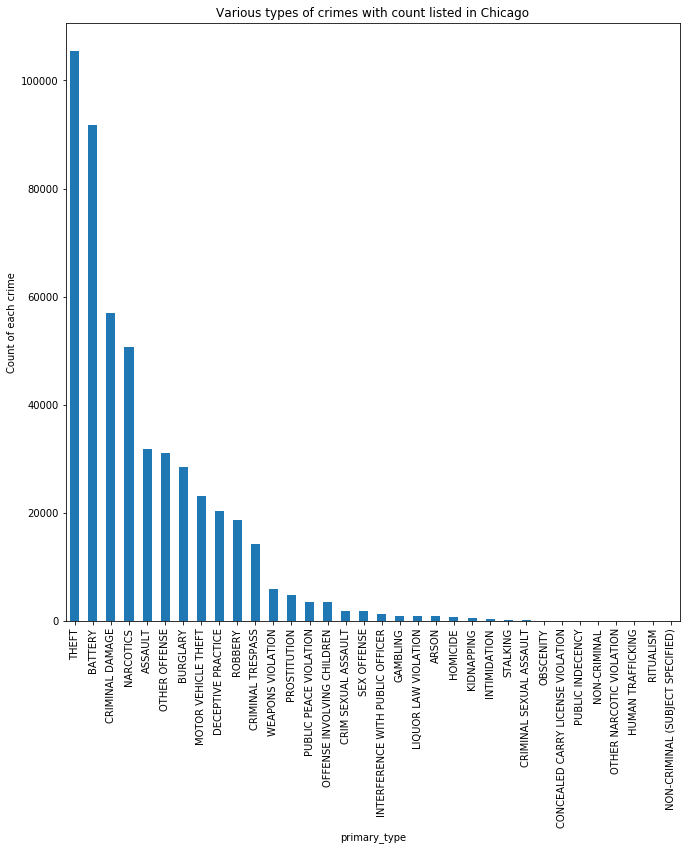

In [61]:
plt.figure(figsize = (11,11))
df01.groupby(df01['primary_type']).size().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Various types of crimes with count listed in Chicago')
plt.ylabel('Count of each crime')
plt.show()

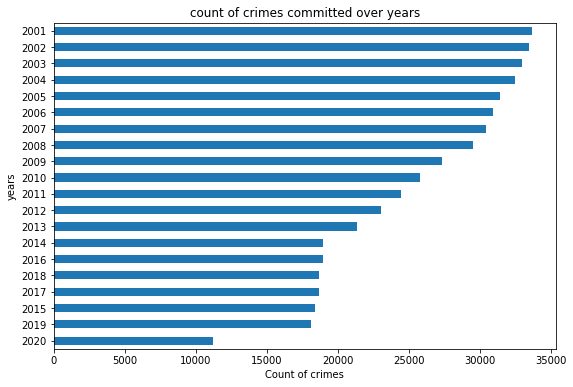

In [70]:
plt.figure(figsize = (9,6))
df01.groupby(df01['year']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.title('count of crimes committed over years')
plt.ylabel('years')
plt.xlabel('Count of crimes')
plt.show()

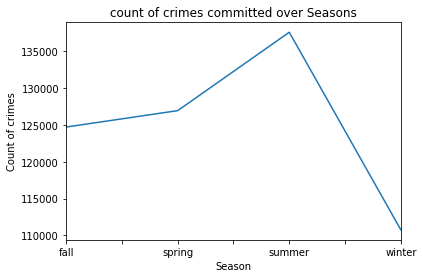

In [75]:
df01.groupby([df01.season]).size().plot.line()
plt.title('count of crimes committed over Seasons')
plt.xlabel('Season')
plt.ylabel('Count of crimes')
plt.show()

In [81]:
CD_dist = df.pivot_table('arrest', aggfunc = np.sum, columns = ['district'], 
                                         index = df01.date, fill_value = 0)
CD_wrd = df.pivot_table('arrest', aggfunc = np.sum, columns = ['ward'], 
                                         index = df01.date, fill_value = 0)
CD_cyrea = df.pivot_table('arrest', aggfunc = np.sum, columns = ['community_area'], 
                                         index = df01.date, fill_value = 0)
#arrestperyear calculation according to arrest
arst_pr_yr = df.groupby('year')['arrest'].value_counts().rename('TotalCounts').to_frame()
arst_pr_yr['percent_value'] = (100 * arst_pr_yr / arst_pr_yr.groupby(level=0).sum())
arst_pr_yr.reset_index(level=[1],inplace=True)
arst_pr_yr

,arrest,TotalCounts,percent_value
year,,,
2001,False,23800,70.683971
2001,True,9871,29.316029
2002,False,23895,71.358180
2002,True,9591,28.641820
2003,False,23179,70.267075
2003,True,9808,29.732925
2004,False,22423,69.038456
2004,True,10056,30.961544
2005,False,21486,68.363613


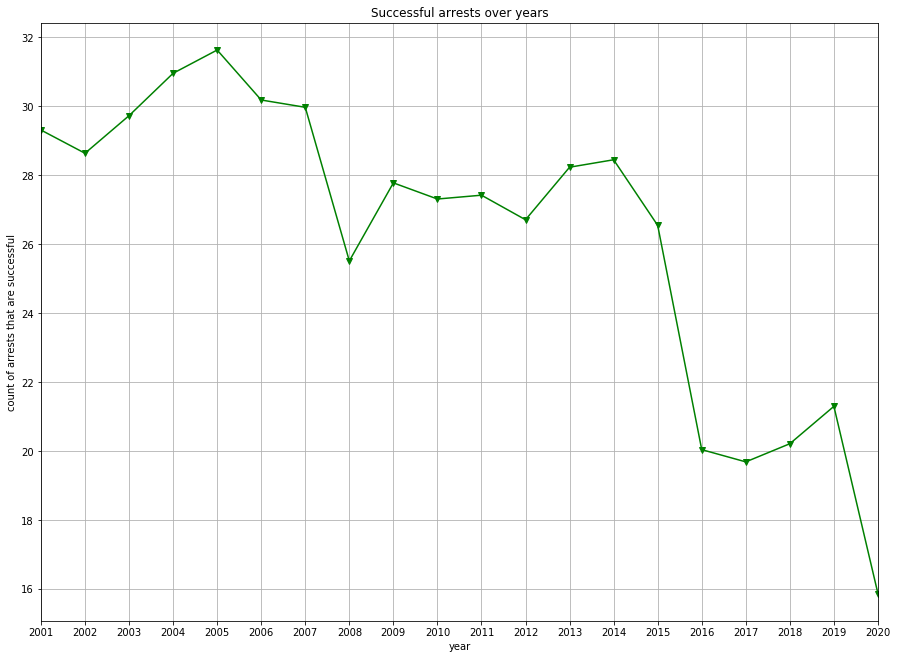

In [98]:
ln_plt = arst_pr_yr[arst_pr_yr['arrest'] == True]['percent_value']

labels = ln_plt.index.values
fig=plt.figure(figsize=(15, 11))
plt.title('Successful arrests over years')
plt.xlabel("years")
plt.ylabel("count of arrests that are successful")
plt.xticks(ln_plt.index, ln_plt.index.values)

ln_plt.plot(grid=True, marker='v', color='green')

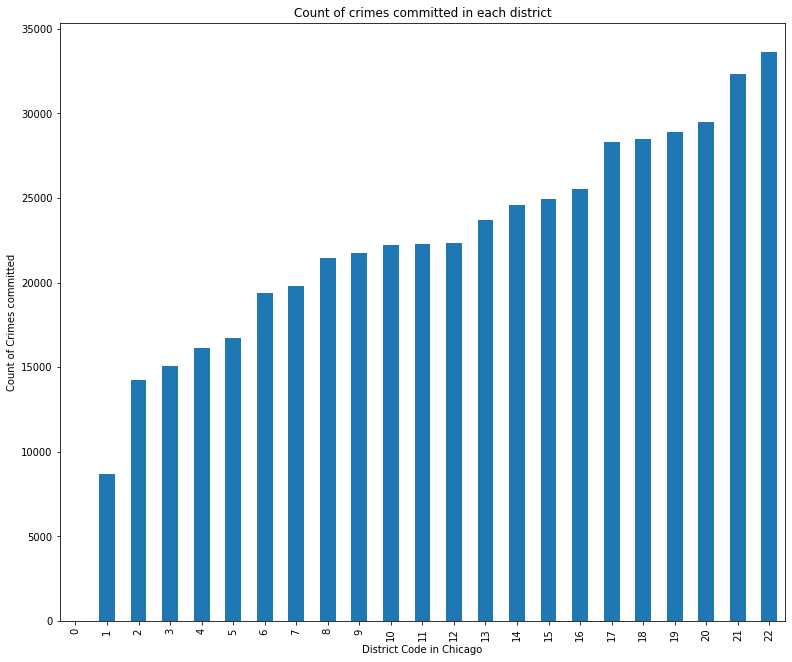

In [104]:
# crimes occured in respective districts
dst_crm = df['district'].value_counts(ascending=True)

## cleaning data
dst_crm.index = dst_crm.index.astype(int)
dst_crm.index = dst_crm.index.astype(str)

## graph ploted for representation
fig=plt.figure(figsize=(13, 11))
plt.title("Count of crimes committed in each district")
plt.ylabel("Count of Crimes committed")
plt.xlabel("District Code in Chicago")
ax = dst_crm.plot(kind='bar')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

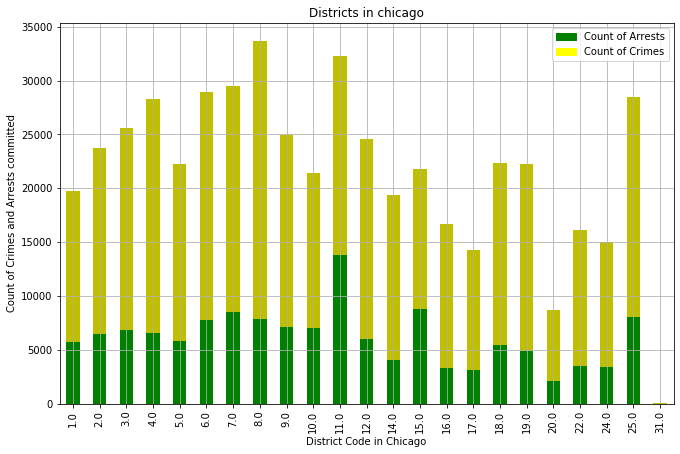

In [105]:
import matplotlib.patches as mpatches
green = mpatches.Patch(color='green', label='Count of Arrests')
yellow = mpatches.Patch(color='yellow', label='Count of Crimes')


#Count of crimes committed in a respective district
plt.figure(figsize = (11,7))
df.groupby(df['district']).size().plot(kind = 'bar', color ='y')
Crime_Data_district.sum().plot(kind = 'bar', color = 'g', grid=True)
plt.title('Districts in chicago')
plt.ylabel("Count of Crimes and Arrests committed")
plt.xlabel("District Code in Chicago")
plt.legend(handles=[green, yellow])

In [123]:
#Model Building

In [177]:
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('training_dataset.csv')
test_data = pd.read_csv('testing_dataset.csv')

In [178]:
train_data.arrest.value_counts()

False    250616
True     101965
Name: arrest, dtype: int64

In [179]:
test_data.arrest.value_counts()

False    71495
True     23695
Name: arrest, dtype: int64

In [180]:
train_data_labels = train_data['arrest']
train_data = train_data[['year', 'domestic','district','season','month','location_description','description','primary_type_grouped','crimes_per_year']]

test_data_labels = test_data['arrest']
test_data = test_data[['year', 'domestic','district','season','month','location_description','description','primary_type_grouped','crimes_per_year']]


In [181]:

train_data.district = pd.factorize(train_data.district)[0]
train_data.location_description = pd.factorize(train_data.location_description)[0]
train_data.description = pd.factorize(train_data.description)[0]


test_data.district = pd.factorize(test_data.district)[0]
test_data.location_description = pd.factorize(test_data.location_description)[0]
test_data.description = pd.factorize(test_data.description)[0]

train_data.primary_type_grouped = pd.factorize(train_data.primary_type_grouped)[0]
test_data.primary_type_grouped = pd.factorize(test_data.primary_type_grouped)[0]

train_data.season = pd.factorize(train_data.season)[0]
test_data.season = pd.factorize(test_data.season)[0]

In [182]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [183]:
train_data.shape

(352581, 9)

In [184]:
test_data.shape

(95190, 9)

In [185]:
x = [i/10 for i in list(range(1,31))]

In [186]:
#Prediction using logistic Regression 

In [205]:
modl = LogisticRegression(C=2.0,class_weight='balanced').fit(train_data, train_data_labels)
y_prediction = modl.predict(test_data)
print(classification_report(test_data_labels, y_prediction))

              precision    recall  f1-score   support

       False       0.80      0.40      0.53     71495
        True       0.28      0.69      0.39     23695

    accuracy                           0.47     95190
   macro avg       0.54      0.54      0.46     95190
weighted avg       0.67      0.47      0.50     95190



In [1]:
#Prediction using Decision Tree Classifier 

In [195]:
modl = DecisionTreeClassifier(class_weight='balanced').fit(train_data, train_data_labels)
y_prediction = modl.predict(test_data)
best_scre = f1_score(test_data_labels, y_prediction)

In [196]:

featur = ''
for column in train_data.columns:
    x = train_data.drop(column, axis=1)
    x_test_data = test_data.drop(column, axis=1)
    modl = DecisionTreeClassifier(class_weight='balanced').fit(x, train_data_labels)
    y_prediction = modl.predict(x_test_data)
    scre = f1_score(test_data_labels, y_prediction)
    if scre > best_scre:
        remove_featur = featur
        best_scre = scre


In [197]:
featur

''

In [198]:

best_scre = 0
best_param = dict()
best_param_list = list()
indx = 0
best_indx = 0
#max_depths = list()
max_depth = [2,3,4,5]
max_features = [2,3,4]
print(f"Max_Depth: {max_depth}")
print(f"Max_Feature: {max_features}")

for x in max_features:
    
    for y in max_depth:
        print(f"Model_Number: {indx}")
        
        modl = DecisionTreeClassifier(max_features=x,max_depth=y,class_weight='balanced').fit(train_data, train_data_labels)
        
        y_prediction = modl.predict(test_data)
        scre = f1_score(test_data_labels, y_prediction)
        print(f"Model_Scre: {scre} Max_Depth: {y} Max_Feature: {x}")
        if scre > best_scre:
            best_scre = f1_score(test_data_labels, y_prediction)
            best_indx = indx
        ab = dict()
        ab['maxdepth'] = y
        ab['maxfeatures'] = x
        best_param_list.append(ab)
        indx += 1


Max_Depth: [2, 3, 4, 5]
Max_Feature: [2, 3, 4]
Model_Number: 0
Model_Scre: 0.3772699427906928 Max_Depth: 2 Max_Feature: 2
Model_Number: 1
Model_Scre: 0.412816300611549 Max_Depth: 3 Max_Feature: 2
Model_Number: 2
Model_Scre: 0.4036307674769871 Max_Depth: 4 Max_Feature: 2
Model_Number: 3
Model_Scre: 0.348426094890511 Max_Depth: 5 Max_Feature: 2
Model_Number: 4
Model_Scre: 0.4070892067085092 Max_Depth: 2 Max_Feature: 3
Model_Number: 5
Model_Scre: 0.4154264070092206 Max_Depth: 3 Max_Feature: 3
Model_Number: 6
Model_Scre: 0.43645550466772043 Max_Depth: 4 Max_Feature: 3
Model_Number: 7
Model_Scre: 0.3137620030512429 Max_Depth: 5 Max_Feature: 3
Model_Number: 8
Model_Scre: 0.3772699427906928 Max_Depth: 2 Max_Feature: 4
Model_Number: 9
Model_Scre: 0.412816300611549 Max_Depth: 3 Max_Feature: 4
Model_Number: 10
Model_Scre: 0.37638633954654743 Max_Depth: 4 Max_Feature: 4
Model_Number: 11
Model_Scre: 0.3976217289691333 Max_Depth: 5 Max_Feature: 4


In [199]:
best_param = best_param_list[best_indx]
best_param

{'maxdepth': 4, 'maxfeatures': 3}

In [200]:
#best_scre

In [210]:
modl = DecisionTreeClassifier(max_depth=5, max_features=4,class_weight='balanced').fit(train_data, train_data_labels)
y_prediction = modl.predict(test_data)
print(classification_report(test_data_labels, y_prediction))

              precision    recall  f1-score   support

       False       0.80      0.69      0.74     71495
        True       0.34      0.49      0.40     23695

    accuracy                           0.64     95190
   macro avg       0.57      0.59      0.57     95190
weighted avg       0.69      0.64      0.66     95190

